# **Método de Euler**

## **Alumno: Niño Pedraza Eduardo**

**Objetivo:**
Aplicar el método de Euler para resolver ecuaciones diferenciales ordinarias (EDO) de primer orden, y analizar los errores de truncación, redondeo y absoluto asociados al método.

**Introducción**: El método de Euler es un método numérico sencillo para aproximar soluciones de ecuaciones diferenciales ordinarias de primer orden. Dado un problema inicial:

$\frac{dy}{dt}= f(t,y)\hspace{1cm}$            $ y(t_0)=y_0$  

El método de Euler aproxima la solución en un intervalo $[t_o,t_f]$ utilizando la fórmula:

$$y_{n+1}= y_n + hf(t_n,y_n)$$

Donde:


*  *h* es el tamaño del paso (la distancia entre puntos sucesivos en el eje x, la cual es homogonea)

## **Ejercicio 3**:

Considerando $t_f$ = 1 realice las aproximaciones para $h$ = 0.1, 0.01, 0.001, 0.0001.


## **Problema 1**

Consideremos la EDO: $\frac{dy}{dx}= x^2y^2\hspace{1cm}$            $ y(0)=1$

Resuelve la EDO usando el método de Euler con un paso h = 0.1, 0.01, 0.001, 0.0001.

Primero basta notar que la solución de la EDO anteriormente planteada es la siguiente:


$y(t) = \frac{1}{1-\frac{t^3}{3}}$

En este caso el tiempo inicial $x=0$ y el tiempo final es $x=1$

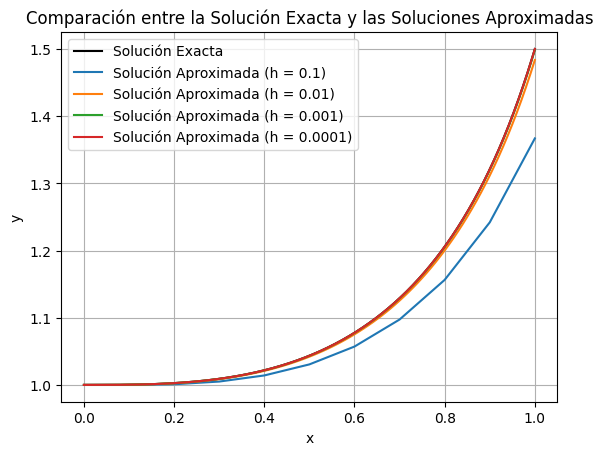

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x, y) para la EDO
def f(x, y):
    return (x**2)*(y**2)
# Solución exacta de la EDO para comparación. Debido a que la ecuación es
# sencilla de resolver de manera analítica, podemos graficar la solución exacta
# para compararla con nuestra solución aproximada.
def solucion(x):
    return 1/(1-x**3/3)

# Método de Euler: Definimos nuestro método de euler
def euler(f, x0, y0, h, xf):
    n = int((xf - x0) / h)
    x= np.linspace(x0, xf, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0

    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])

    return x, y

# Parámetros del problema
x0 = 0
y0 = 1
xf = 1

#Definimos los valores de h
h = [0.1, 0.01, 0.001, 0.0001]

# Generación de la solución exacta para comparación
x = np.linspace(x0, xf, 1000)
y_exacta = solucion(x)

# Graficar la solución exacta
plt.plot(x, y_exacta, 'k-', label='Solución Exacta')

# Generar y graficar las soluciones aproximadas para cada h
for i in h:
    x, y_approximada = euler(f, x0, y0, i, xf)
    plt.plot(x, y_approximada, label=f'Solución Aproximada (h = {i})')

# Configurar y mostrar la gráfica
plt.title("Comparación entre la Solución Exacta y las Soluciones Aproximadas")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

En este caso, vemos que la solución obtenida analiticamente de y en el dominio de $0\leq x \leq 1$ tiene un comportamiento bueno (no explota), en este caso vemos que conforma mas pequeño hacemos el valor del tamaño de paso tenemos una mejor aproximación, en este caso con el $h=0.0001$ tenemos una aproximación muy buena.

Graficamos el error de truncamiento

Tamaño de paso h = 0.1
Error de truncamiento global: 1.33160e-01
Tamaño de paso h = 0.01
Error de truncamiento global: 1.65208e-02
Tamaño de paso h = 0.001
Error de truncamiento global: 1.69480e-03
Tamaño de paso h = 0.0001
Error de truncamiento global: 1.69922e-04


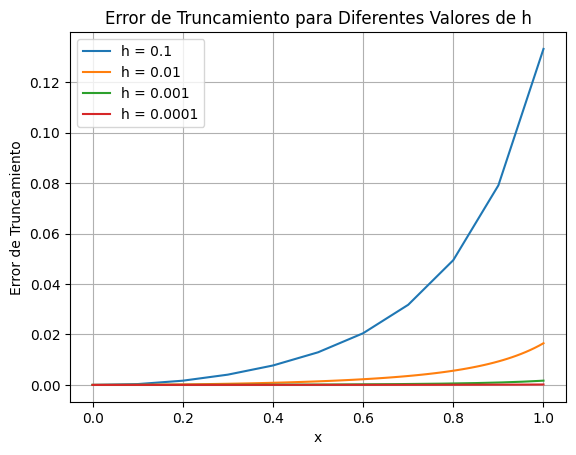

In [ ]:
#Cálculo del Error de Truncamiento
# Diferentes tamaños de paso h a utilizar
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_trun = np.abs(y_exacta - y_approximada)

    print(f"Tamaño de paso h = {h}")
    print(f"Error de truncamiento global: {Error_trun[-1]:.5e}")
    plt.plot(x, Error_trun, label=f'h = {h}')


plt.title("Error de Truncamiento para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error de Truncamiento")
plt.legend()
plt.grid(True)
plt.show()

De esta gráfical, el error de truncamiento decrece conforma va disminuyendo el tamaño de paso hasta practicamente llegar a 0, mientras que en el $h=0.1$ tenemos un error de truncamiento bastante grande que llega hasta $0.12$; de igual manera pasa con el error absoluto, pues en este caso la formula es la misma.

Finalmente, realizamos la gráfica del error absoluto con diferentes valores de h

Precisión numérica: 10 dígitos
Error de redondeo en y(1): 4.42826e-02
Precisión numérica: 15 dígitos
Error de redondeo en y(1): 4.42827e-02
Precisión numérica: 20 dígitos
Error de redondeo en y(1): 4.42827e-02


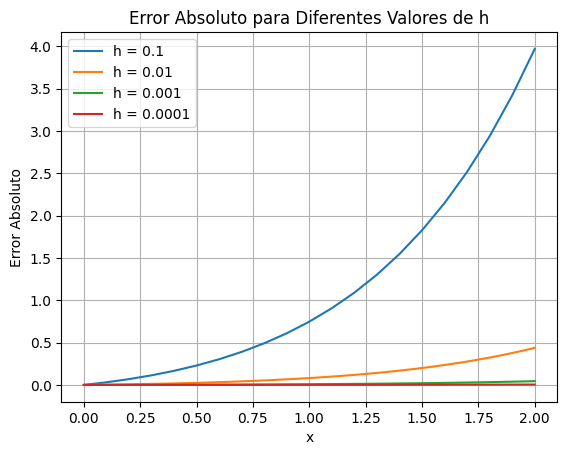

In [ ]:
# Ejercicio 2: Análisis del Error de Redondeo
# Implementación con diferentes precisiones
import decimal

def euler_precision(f, x0, y0, h, xf, precision):
    decimal.getcontext().prec = precision
    h = decimal.Decimal(h)
    x = decimal.Decimal(x0)
    y = decimal.Decimal(y0)
    n_steps = int((xf - x0) / float(h))

    y_values = [y0]
    for _ in range(n_steps):
        y = y + h * decimal.Decimal(f(float(x), float(y)))
        x = x + h
        y_values.append(float(y))

    return np.linspace(x0, xf, n_steps + 1), np.array(y_values)

precisions = [10, 15, 20]  # Precisión en dígitos decimales
h = 0.001
for precision in precisions:
    x, y_approximada = euler_precision(f, x0, y0, h, xf, precision)
    y_exacta = solucion(x)
    Error_redondeo = np.abs(y_exacta[-1] - y_approximada[-1])

    print(f"Precisión numérica: {precision} dígitos")
    print(f"Error de redondeo en y(1): {Error_redondeo:.5e}")

#  Cálculo del Error Absoluto
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_abs = np.abs(y_exacta - y_approximada)

    plt.plot(x, Error_abs, label=f'h = {h}')

plt.title("Error Absoluto para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error Absoluto")
plt.legend()
plt.grid(True)
plt.show()

Seguimos con $x=2$ como tiempo final

/tmp/ipython-input-360230097.py:6: RuntimeWarning: overflow encountered in scalar power
  return (x**2)*(y**2)


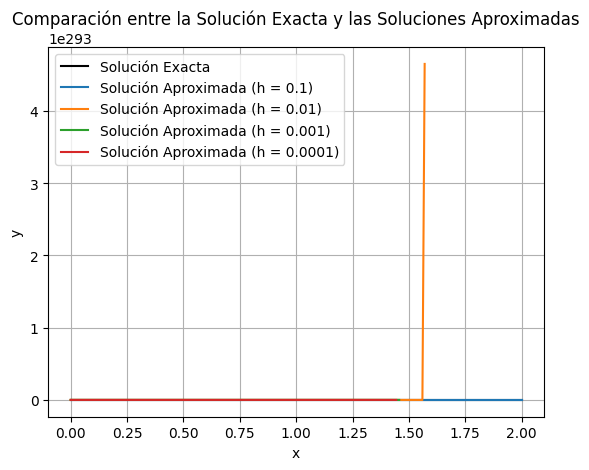

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x, y) para la EDO
def f(x, y):
    return (x**2)*(y**2)
# Solución exacta de la EDO para comparación. Debido a que la ecuación es
# sencilla de resolver de manera analítica, podemos graficar la solución exacta
# para compararla con nuestra solución aproximada.
def solucion(x):
    return 1/(1-x**3/3)

# Método de Euler: Definimos nuestro método de euler
def euler(f, x0, y0, h, xf):
    n = int((xf - x0) / h)
    x= np.linspace(x0, xf, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0

    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])

    return x, y

# Parámetros del problema
x0 = 0
y0 = 1
xf = 2

#Definimos el valor de h
h = [0.1, 0.01, 0.001, 0.0001]

# Generación de la solución exacta para comparación
x = np.linspace(x0, xf, 1000)
y_exacta = solucion(x)

# Graficar la solución exacta
plt.plot(x, y_exacta, 'k-', label='Solución Exacta')

# Generar y graficar las soluciones aproximadas para cada h
for i in h:
    x, y_approximada = euler(f, x0, y0, i, xf)
    plt.plot(x, y_approximada, label=f'Solución Aproximada (h = {i})')

# Configurar y mostrar la gráfica
plt.title("Comparación entre la Solución Exacta y las Soluciones Aproximadas")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

En este caso, podemos ver que la solución se comporta de manera fea, pero la razón del comportamiento es la misma naturaleza de la solución de la ecuación pues, para que la solución se comporte de buena manera tenemos que asegurar que el tiempo en el que se situa la solución no haga que la solución explote, en este caso, si llegara a pasar que:

$1-\frac{x^3}{3}=0 \Rightarrow x = \sqrt[3]{3} \approx 1.442249$

la solución deja de existir, lo que claramente podemos ver en este caso, razón por la cual la gráfica sale de la manera que podemos ver.

Continuamos con el error de truncamiento

Tamaño de paso h = 0.1
Error de truncamiento global: 8.63757e+09
Tamaño de paso h = 0.01
Error de truncamiento global: inf
Tamaño de paso h = 0.001
Error de truncamiento global: inf
Tamaño de paso h = 0.0001
Error de truncamiento global: inf


/tmp/ipython-input-360230097.py:6: RuntimeWarning: overflow encountered in scalar power
  return (x**2)*(y**2)


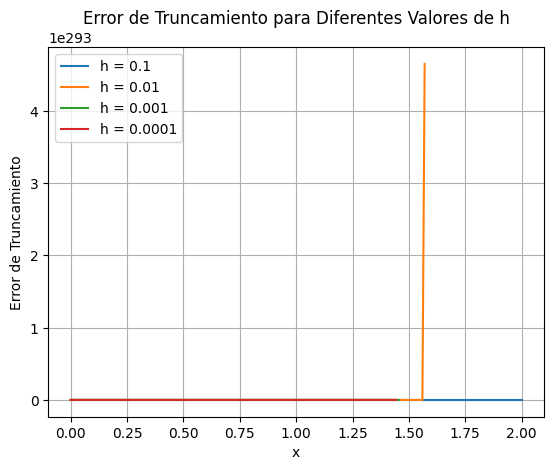

In [ ]:
#Cálculo del Error de Truncamiento
# Diferentes tamaños de paso h a utilizar
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_trun = np.abs(y_exacta - y_approximada)

    print(f"Tamaño de paso h = {h}")
    print(f"Error de truncamiento global: {Error_trun[-1]:.5e}")
    plt.plot(x, Error_trun, label=f'h = {h}')


plt.title("Error de Truncamiento para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error de Truncamiento")
plt.legend()
plt.grid(True)
plt.show()

Finalmente, terminamos con el error absoluto para diferentes h

/tmp/ipython-input-360230097.py:6: RuntimeWarning: overflow encountered in scalar power
  return (x**2)*(y**2)


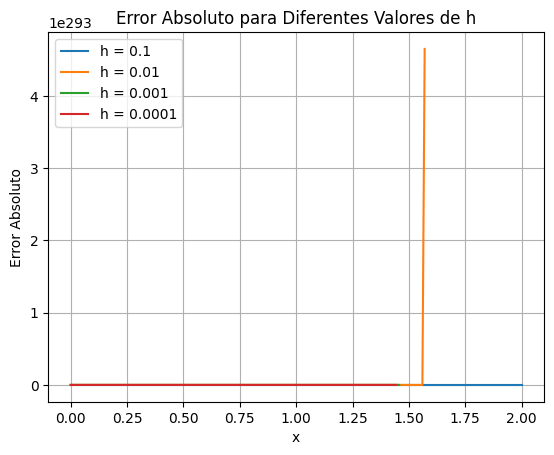

In [ ]:
#  Cálculo del Error Absoluto
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_abs = np.abs(y_exacta - y_approximada)

    plt.plot(x, Error_abs, label=f'h = {h}')

plt.title("Error Absoluto para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error Absoluto")
plt.legend()
plt.grid(True)
plt.show()

## **Problema 2**

Considere la EDO $\frac{dy}{dx}=5x+y$

Resuelve la EDO usando el método de Euler con un paso h = 0.1, 0.01, 0.001, 0.0001.

Primero basta notar que la solución de la EDO anteriormente planteada es la siguiente:


$y(t) = 6e^x-5(x+1)$

Comenzamos con tiempo inicial $x=0$ y tiempo final $x=1$

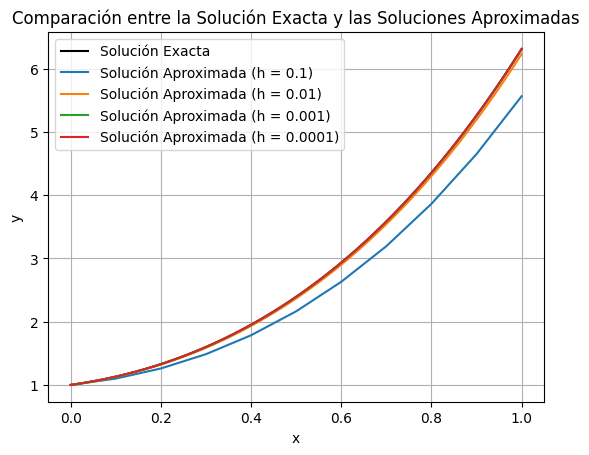

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x, y) para la EDO
def f(x, y):
    return 5*x+y
# Solución exacta de la EDO para comparación. Debido a que la ecuación es
# sencilla de resolver de manera analítica, podemos graficar la solución exacta
# para compararla con nuestra solución aproximada.
def solucion(x):
    return 6*np.exp(x)-5*(x+1)

# Método de Euler: Definimos nuestro método de euler
def euler(f, x0, y0, h, xf):
    n = int((xf - x0) / h)
    x= np.linspace(x0, xf, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0

    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])

    return x, y

# Parámetros del problema
x0 = 0
y0 = 1
xf = 1

#Definimos los diferentes valores de h
h = [0.1, 0.01, 0.001, 0.0001]

# Generación de la solución exacta para comparación
x = np.linspace(x0, xf, 1000)
y_exacta = solucion(x)

# Graficar la solución exacta
plt.plot(x, y_exacta, 'k-', label='Solución Exacta')

# Generar y graficar las soluciones aproximadas para cada h
for i in h:
    x, y_approximada = euler(f, x0, y0, i, xf)
    plt.plot(x, y_approximada, label=f'Solución Aproximada (h = {i})')

# Configurar y mostrar la gráfica
plt.title("Comparación entre la Solución Exacta y las Soluciones Aproximadas")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

En este caso, vemos que la solución esta bien definida para todos los valores de $x \in \mathbb{R}$, por lo que las soluciones estan bien definidas sin importar si ampliamos el intervalo de tiempo.

Graficamos el error de truncamiento

Tamaño de paso h = 0.1
Error de truncamiento global: 7.47236e-01
Tamaño de paso h = 0.01
Error de truncamiento global: 8.08080e-02
Tamaño de paso h = 0.001
Error de truncamiento global: 8.14738e-03
Tamaño de paso h = 0.0001
Error de truncamiento global: 8.15410e-04


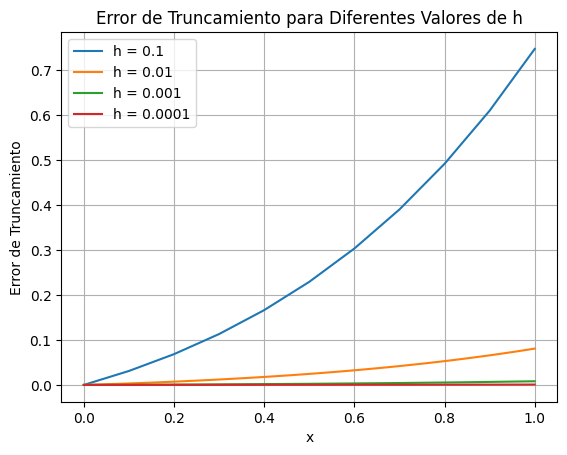

In [ ]:
#Cálculo del Error de Truncamiento
# Diferentes tamaños de paso h a utilizar
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_trun = np.abs(y_exacta - y_approximada)

    print(f"Tamaño de paso h = {h}")
    print(f"Error de truncamiento global: {Error_trun[-1]:.5e}")
    plt.plot(x, Error_trun, label=f'h = {h}')


plt.title("Error de Truncamiento para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error de Truncamiento")
plt.legend()
plt.grid(True)
plt.show()

Conforme aumenta el tamaño de paso el error de truncamiento también aumenta, en este caso el mejor ajuste es con el $h=0.0001$ con un error de truncamiento cercano a cero. Ademas lo mismo pasa con el erro absoluto conforme variamos la h.

Finalmente, terminamos graficando el error absoluto con diferentes h

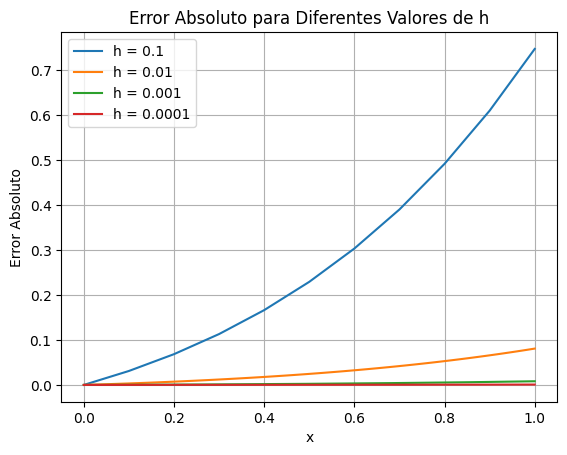

In [ ]:
#  Cálculo del Error Absoluto
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_abs = np.abs(y_exacta - y_approximada)

    plt.plot(x, Error_abs, label=f'h = {h}')

plt.title("Error Absoluto para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error Absoluto")
plt.legend()
plt.grid(True)
plt.show()

Continuamos con tiempo inicial $x=0$ y tiempo final $x=2$

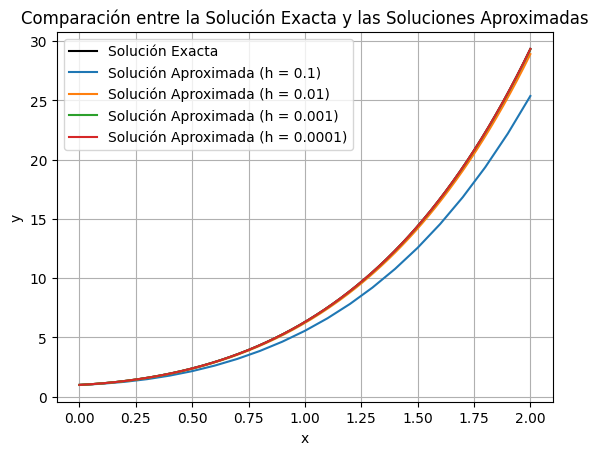

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x, y) para la EDO
def f(x, y):
    return 5*x+y
# Solución exacta de la EDO para comparación. Debido a que la ecuación es
# sencilla de resolver de manera analítica, podemos graficar la solución exacta
# para compararla con nuestra solución aproximada.
def solucion(x):
    return 6*np.exp(x)-5*(x+1)

# Método de Euler: Definimos nuestro método de euler
def euler(f, x0, y0, h, xf):
    n = int((xf - x0) / h)
    x= np.linspace(x0, xf, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0

    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])

    return x, y

# Parámetros del problema
x0 = 0
y0 = 1
xf = 2

#Definimos diferentes valores de h
h = [0.1, 0.01, 0.001, 0.0001]

# Generación de la solución exacta para comparación
x = np.linspace(x0, xf, 1000)
y_exacta = solucion(x)

# Graficar la solución exacta
plt.plot(x, y_exacta, 'k-', label='Solución Exacta')

# Generar y graficar las soluciones aproximadas para cada h
for i in h:
    x, y_approximada = euler(f, x0, y0, i, xf)
    plt.plot(x, y_approximada, label=f'Solución Aproximada (h = {i})')

# Configurar y mostrar la gráfica
plt.title("Comparación entre la Solución Exacta y las Soluciones Aproximadas")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Garficamos el error de truncamiento

Tamaño de paso h = 0.1
Error de truncamiento global: 3.96934e+00
Tamaño de paso h = 0.01
Error de truncamiento global: 4.38229e-01
Tamaño de paso h = 0.001
Error de truncamiento global: 4.42827e-02
Tamaño de paso h = 0.0001
Error de truncamiento global: 4.43292e-03


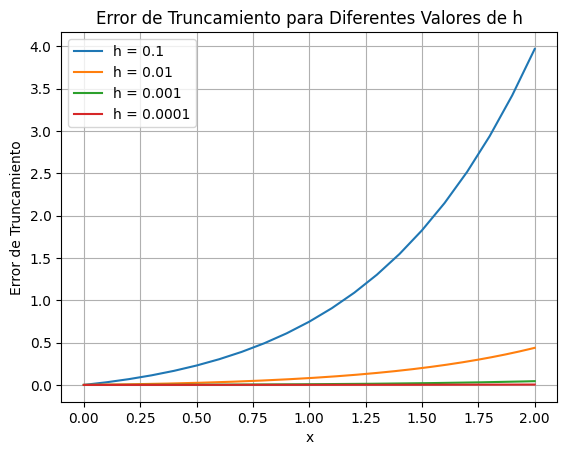

In [ ]:
#Cálculo del Error de Truncamiento
# Diferentes tamaños de paso h a utilizar
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_trun = np.abs(y_exacta - y_approximada)

    print(f"Tamaño de paso h = {h}")
    print(f"Error de truncamiento global: {Error_trun[-1]:.5e}")
    plt.plot(x, Error_trun, label=f'h = {h}')


plt.title("Error de Truncamiento para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error de Truncamiento")
plt.legend()
plt.grid(True)
plt.show()

Finalmente, graficamos el error absoluto para diferentes h

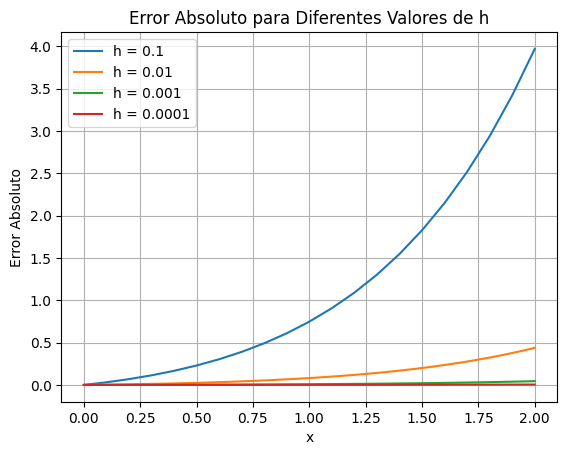

In [ ]:
#  Cálculo del Error Absoluto
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_abs = np.abs(y_exacta - y_approximada)

    plt.plot(x, Error_abs, label=f'h = {h}')

plt.title("Error Absoluto para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error Absoluto")
plt.legend()
plt.grid(True)
plt.show()